In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  


df = pd.read_csv('strep_tb.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 106
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           106 non-null    int64 
 1   arm                  106 non-null    object
 2   dose_strep_g         106 non-null    int64 
 3   dose_PAS_g           106 non-null    int64 
 4   gender               106 non-null    object
 5   baseline_condition   106 non-null    object
 6   baseline_temp        106 non-null    object
 7   baseline_esr         106 non-null    object
 8   baseline_cavitation  106 non-null    object
 9   strep_resistance     106 non-null    object
 10  radiologic_6m        106 non-null    object
 11  rad_num              106 non-null    int64 
 12  improved             106 non-null    bool  
dtypes: bool(1), int64(4), object(8)
memory usage: 10.9+ KB


In [14]:
df['arm'].value_counts()

Streptomycin    55
Control         51
Name: arm, dtype: int64

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


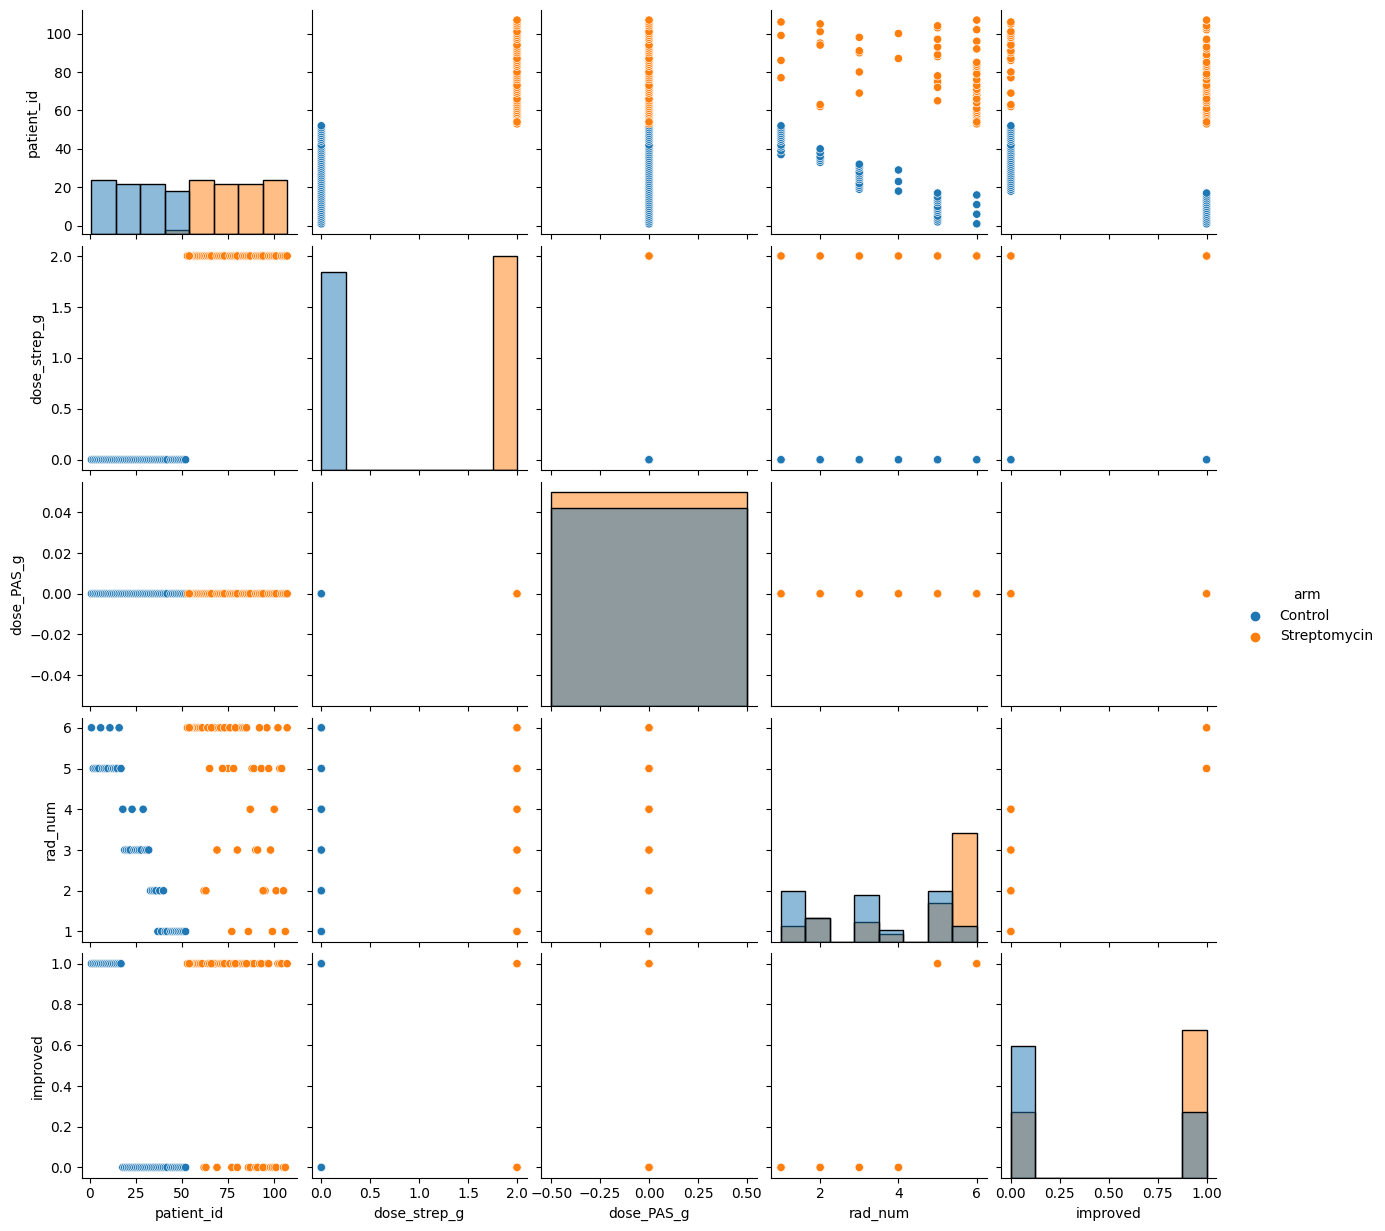

In [15]:
sns.pairplot(df, hue='arm', diag_kind='hist')


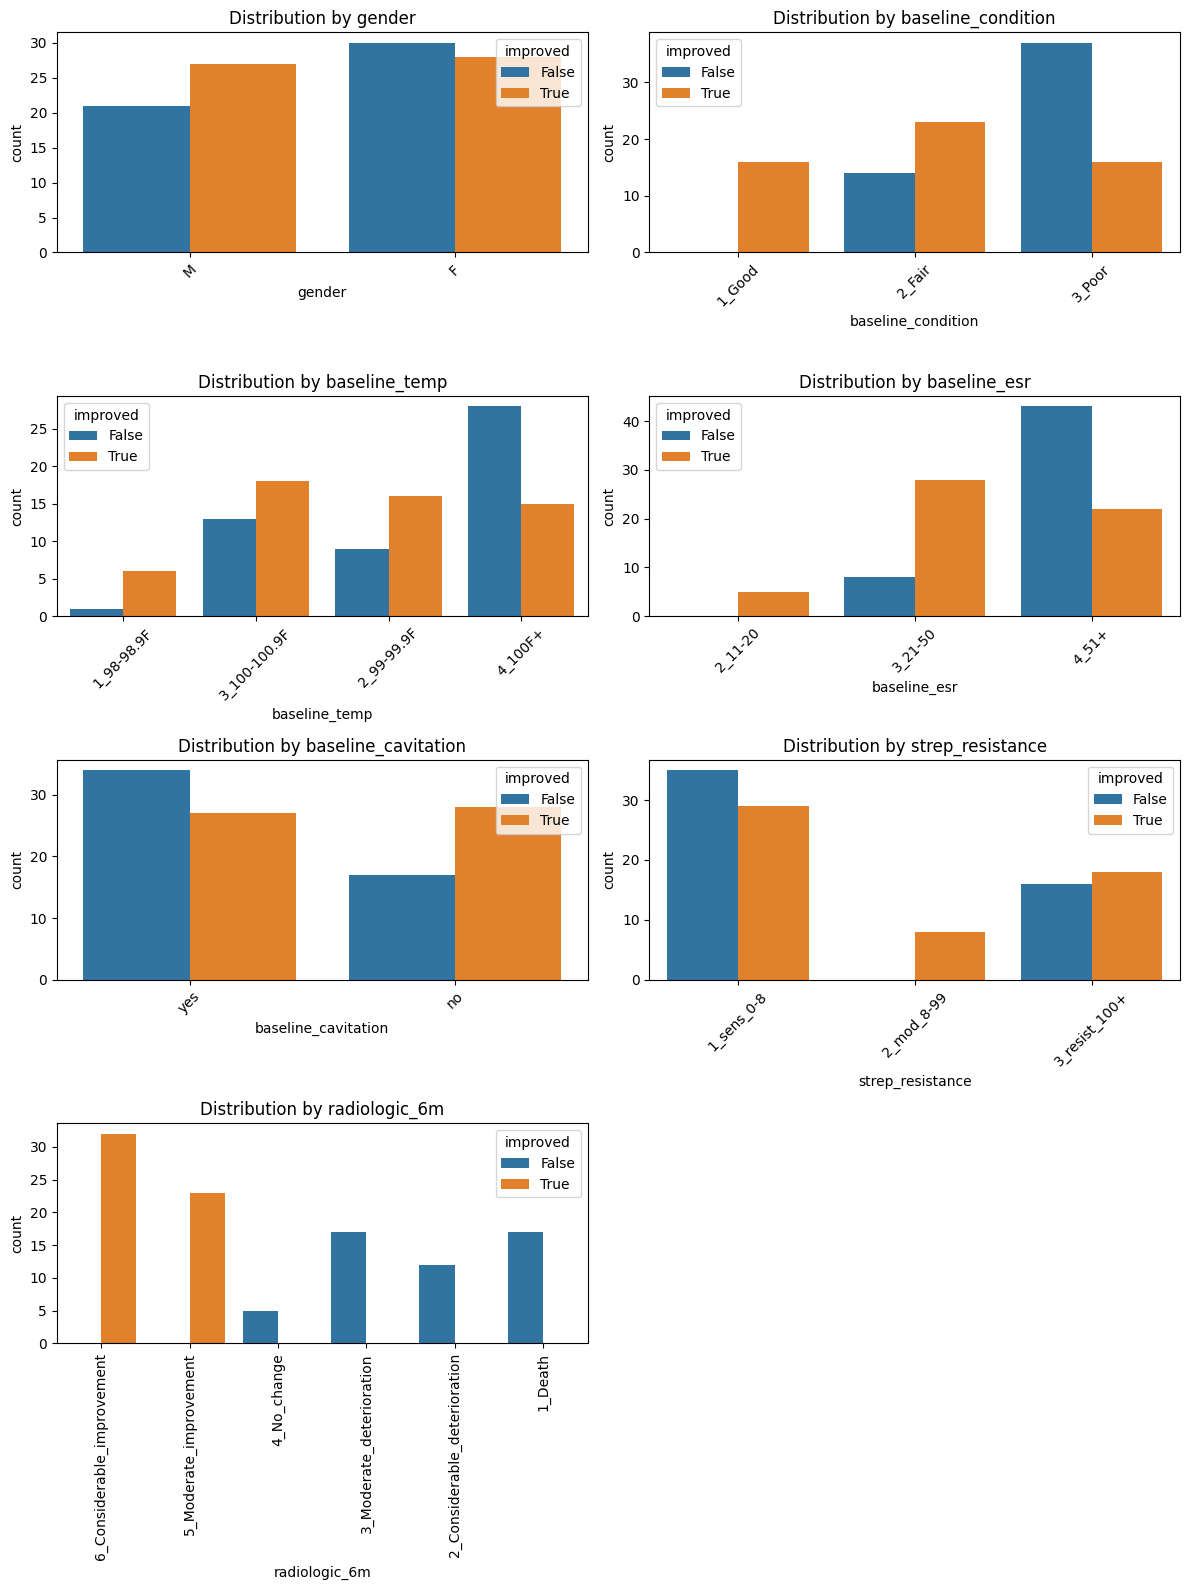

In [16]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.title('Distribution by gender')
sns.countplot(x='gender', data=df, hue='improved')
plt.xticks(rotation=45)


plt.subplot(4, 2, 2)
plt.title('Distribution by baseline_condition')
sns.countplot(x='baseline_condition', data=df, hue='improved')
plt.xticks(rotation=45)


plt.subplot(4, 2, 3)
plt.title('Distribution by baseline_temp')
sns.countplot(x='baseline_temp', data=df, hue='improved')
plt.xticks(rotation=45)


plt.subplot(4, 2, 4)
plt.title('Distribution by baseline_esr')
sns.countplot(x='baseline_esr', data=df, hue='improved')
plt.xticks(rotation=45)


plt.subplot(4, 2, 5)
plt.title('Distribution by baseline_cavitation')
sns.countplot(x='baseline_cavitation', data=df, hue='improved')
plt.xticks(rotation=45)


plt.subplot(4, 2, 6)
plt.title('Distribution by strep_resistance')
sns.countplot(x='strep_resistance', data=df, hue='improved')
plt.xticks(rotation=45)


plt.subplot(4, 2, 7)
plt.title('Distribution by radiologic_6m')
sns.countplot(x='radiologic_6m', data=df, hue='improved')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

/var/folders/lf/v92_5zrn6k3ch09dnnm3cj1r0000gn/T/ipykernel_42655/2463212988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

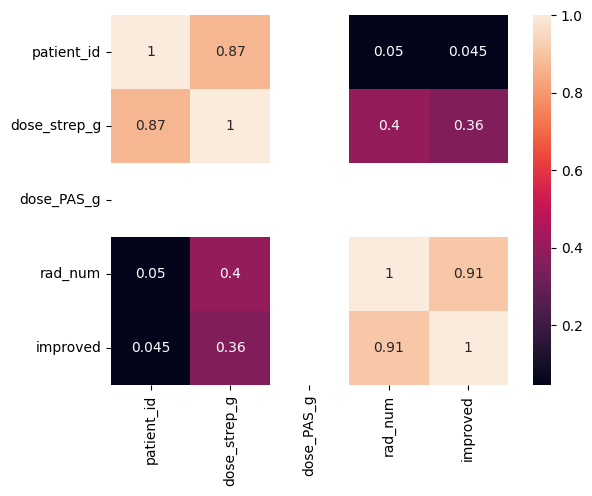

In [17]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


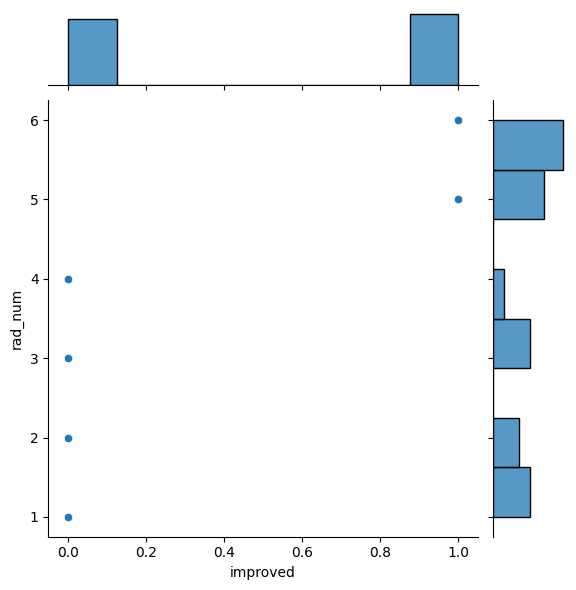

In [18]:
sns.jointplot(x='improved', y='rad_num', data=df, kind='scatter')

(array([0, 1, 2]),
 [Text(0, 0, '1_Good'), Text(1, 0, '2_Fair'), Text(2, 0, '3_Poor')])

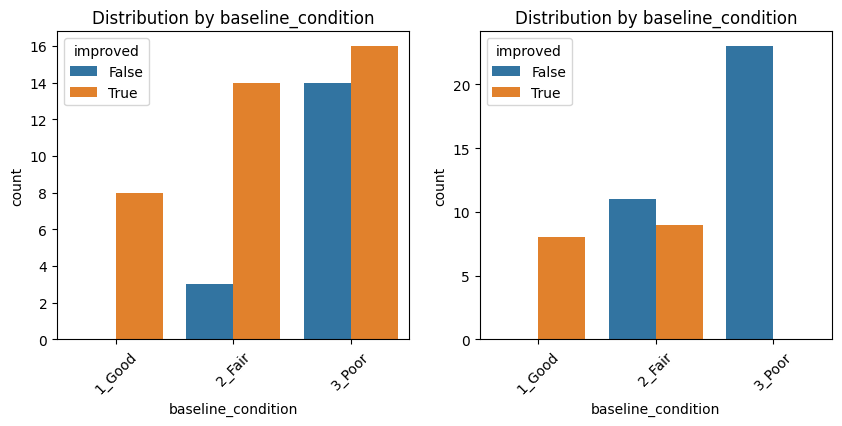

In [19]:
df_no_medicin = df[df['arm'] == 'Control' ]
df_medicin = df[df['arm'] == 'Streptomycin' ]

plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.title('Distribution by baseline_condition')
sns.countplot(x='baseline_condition', data=df_medicin, hue='improved')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.title('Distribution by baseline_condition')
sns.countplot(x='baseline_condition', data=df_no_medicin, hue='improved')
plt.xticks(rotation=45)




## Ideas

Feature 1
- medicin
- no medicin

Featrue 2
- Good
- Fair
- Poor

Prior = best guess

THETA = DEAD/ALIVE 
INPUT = medicin  

alpha

Easiest
THETA = alpha * medicin + beta
Theta > 0.5 ALIVE else DEAD


2 model
THETA = alpha * medicin + beta

THETA = alpha * DOSE + beta * BASELINECONDITION

FEAUTRES
- Temp
- Radiologi
- Dosage

Output
imtporved/NOT improved


- Logistic regression
- Hierarichal model with temp



In [20]:

df_temp = df['baseline_temp'].copy()

replacements_temp = {
    '1_98-98.9F': 98,
    '2_99-99.9F': 99,
    '3_100-100.9F': 100,
    '4_100F+': 101
}

df['baseline_temp'] = df['baseline_temp'].replace(replacements_temp)

replacements_esr = {
    '2_11-20' : 15.5 , '3_21-50': 35.5, '4_51+' : 52
}


df['baseline_esr'] = df['baseline_esr'].replace(replacements_esr)

replacements_bool = {
    'False': 0,
    'True': 1
}

df['improved'] = df['improved'].replace(replacements_bool).astype(int)

replacements_arm = {
    'Control': 0,
    'Streptomycin': 1
}
df['arm'] = df['arm'].replace(replacements_arm).astype(int)

new_df =  df[['arm','baseline_temp', 'baseline_esr', 'improved']]
#new_df = new_df.sample(frac=1).reset_index(drop=True)




def scale(arrays):
    return (arrays - arrays.min()) / (arrays.max() - arrays.min())

#new_df['baseline_temp'] = scale(new_df['baseline_temp'])
#new_df['baseline_esr'] = scale(new_df['baseline_esr'])

new_df.head()

new_df.to_csv('strep_tb_scaled.csv')



<Axes: >

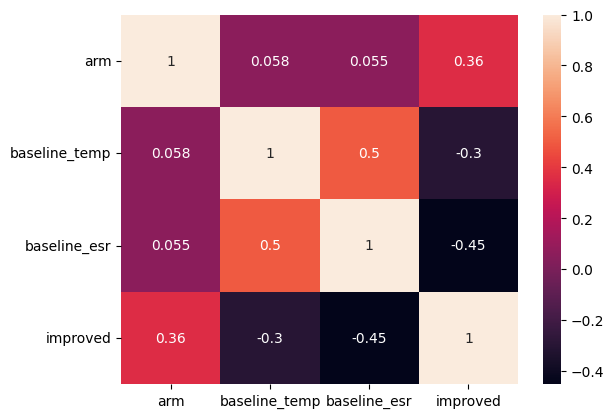

In [25]:
import seaborn as sns
new_correlation_matrix = new_df.corr()
sns.heatmap(new_correlation_matrix, annot=True)
